In [2]:
# libs
import numpy as pd
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split

# PRECIFICAÇÃO DE HOTÉIS

In [3]:
# Dataset
df = pd.read_csv('/home/eduardomdalmaso/Documents/alura/regressao_linear/data/hoteis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [4]:
# Correlação Variaveis x Preco
corr = df.corr()
corr['Preco']

Estrelas              0.401099
ProximidadeTurismo   -0.697142
Capacidade            0.531866
Preco                 1.000000
Name: Preco, dtype: float64

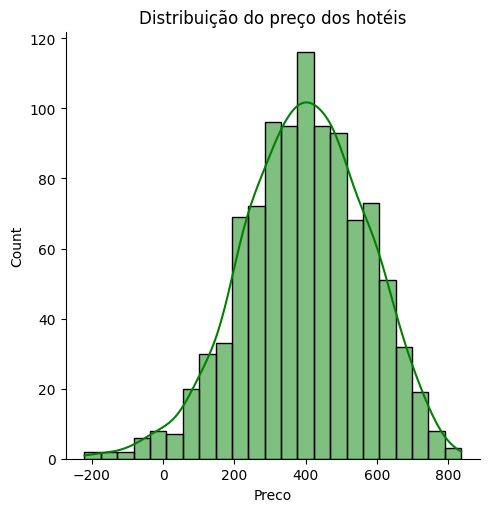

In [26]:
# Distribuição da variavel Preco
sns.displot(df['Preco'], kde=True, color='green')
plt.title('Distribuição do preço dos hotéis')
plt.show()

In [35]:
# Treino e teste
X = df.drop(columns='Preco')
y = df['Preco']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.3,
                                                    random_state=1)


In [36]:
# Dados
df_train = pd.DataFrame(data=X_train)
df_train['Preco'] = y_train

In [37]:
# Modelo base
mod_0 = ols('Preco ~ ProximidadeTurismo', data= df_train).fit()

In [38]:
# Parametros
print("Parâmetros -------------")
print(mod_0.params)

Parâmetros -------------
Intercept             553.544384
ProximidadeTurismo    -20.289805
dtype: float64


In [39]:
# Sumário do modelo
print(mod_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     635.5
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          3.29e-100
Time:                        16:21:48   Log-Likelihood:                -4368.7
No. Observations:                 700   AIC:                             8741.
Df Residuals:                     698   BIC:                             8750.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            553.5444      7

In [40]:
# R²
print(mod_0.rsquared)

0.4765839545886078


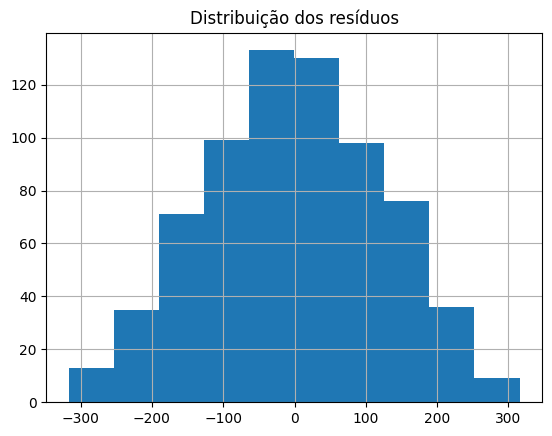

In [41]:
# Plot da distribuição
mod_0.resid.hist()
plt.title("Distribuição dos resíduos")
plt.show()

In [45]:
# definindo o Y previsto
y_predict = mod_0.predict(X_test)
# printando o r²
print("Predição de R²: ", r2_score(y_test, y_predict))

Predição de R²:  0.5055042703587416


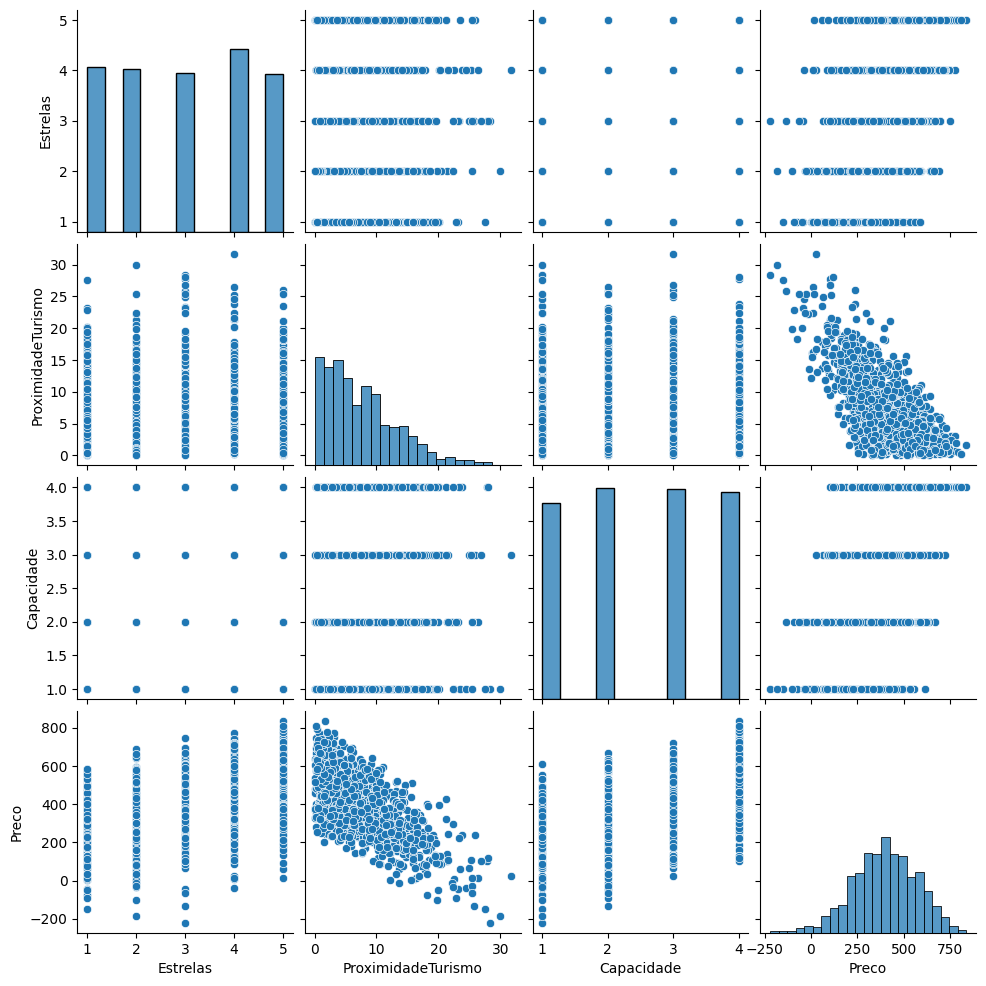

In [46]:
# Analisando co-relação entre as variáveis
sns.pairplot(df)

In [47]:
df.columns

Index(['Estrelas', 'ProximidadeTurismo', 'Capacidade', 'Preco'], dtype='object')

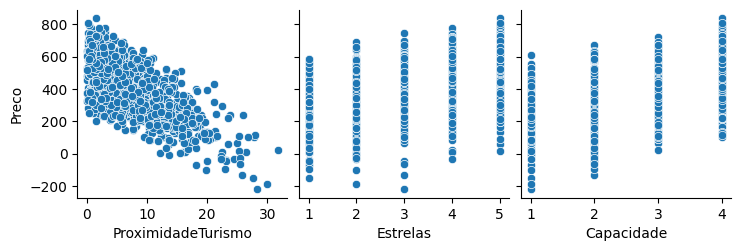

In [50]:
#Vamos olhar apenas com y_vars='preco_de_venda'
sns.pairplot(df, y_vars = 'Preco', x_vars = ['ProximidadeTurismo','Estrelas','Capacidade'])

In [51]:
# Constante -- ADD
X_train = sm.add_constant(X_train)

In [57]:
# Criando o modelo de regressão (sem fómula): saturado
mod_1 = sm.OLS(y_train,
                  X_train[['const','Estrelas','Capacidade','ProximidadeTurismo']]).fit()

In [58]:
# Criando o modelo de regressão (Sem estrelas): saturado
mod_2 = sm.OLS(y_train,
                  X_train[['const','Capacidade','ProximidadeTurismo']]).fit()

In [60]:
# Criando o modelo de regressão (Sem Capacidade): saturado
mod_3 = sm.OLS(y_train,
                  X_train[['const','Estrelas','ProximidadeTurismo']]).fit()

In [61]:
# Resumo do modelo 1
print(mod_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     2700.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:28:53   Log-Likelihood:                -3707.4
No. Observations:                 700   AIC:                             7423.
Df Residuals:                     696   BIC:                             7441.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                196.6452      6

In [62]:
# Resumo do modelo 1
print(mod_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     1082.
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          2.06e-214
Time:                        16:28:56   Log-Likelihood:                -4101.1
No. Observations:                 700   AIC:                             8208.
Df Residuals:                     697   BIC:                             8222.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                346.5742      9

In [63]:
# Resumo do modelo 1
print(mod_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     630.0
Date:                Sat, 03 Aug 2024   Prob (F-statistic):          5.56e-157
Time:                        16:28:59   Log-Likelihood:                -4233.9
No. Observations:                 700   AIC:                             8474.
Df Residuals:                     697   BIC:                             8488.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                401.3903     10

In [64]:
# Comparando modelos
print("R²")
print("Modelo 0:", mod_0.rsquared)
print("Modelo 1:", mod_1.rsquared)
print("Modelo 2:", mod_2.rsquared)
print("Modelo 3:", mod_3.rsquared)

R²
Modelo 0: 0.4765839545886078
Modelo 1: 0.920874276015319
Modelo 2: 0.7563080678591442
Modelo 3: 0.6438474161815182


Conforme entendi durante o aprendizado, escolheria o modelo 1, por apresentar uma co-relação e um R² mais forte entre as colunas comparadas à coluna Preço.